<h2 style="color: #3B38A0;">Mushroom Classification</h2> 

<img src= "mushrooms.jpg" width="500"/>

<h2 style="color: #3B38A0;">Introduction</h2>

This project focuses on classifying mushrooms as edible or poisonous based on various features.

<h2 style="color: #3B38A0;"> Required Libraries</h2>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

<h2 style="color: #3B38A0;"> Data Import and Overview</h2>

In [13]:
df=pd.read_csv("mushrooms.csv")

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


<h2 style="color: #3B38A0;"> Exploratory Data Analysis (EDA)</h2>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [25]:
df.shape

(8124, 23)

In [27]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [29]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

 <h2 style="color: #3B38A0;"> Data Visualization</h2>

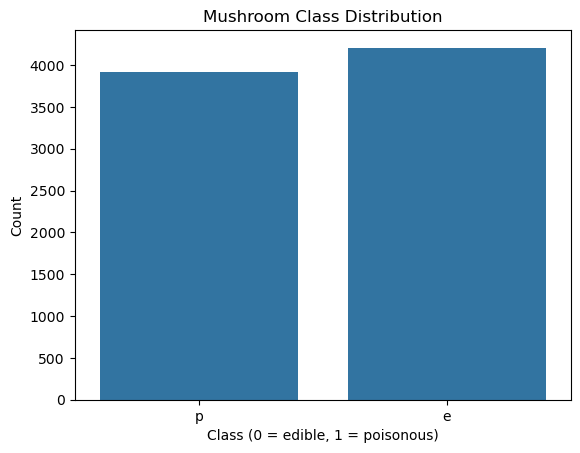

In [33]:
sns.countplot(x="class", data=df)
plt.title("Mushroom Class Distribution")
plt.xlabel("Class (0 = edible, 1 = poisonous)")
plt.ylabel("Count")
plt.show()

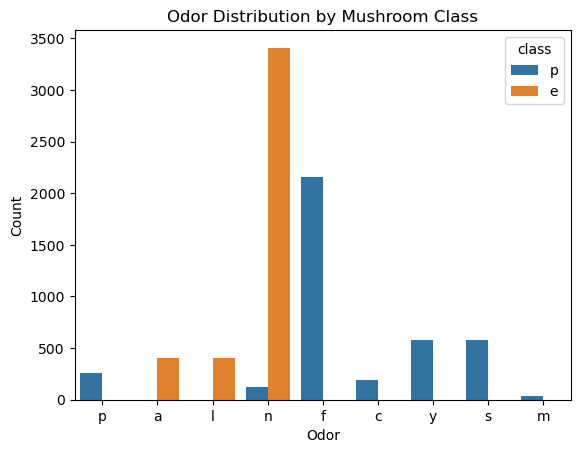

In [35]:
sns.countplot(x="odor", hue="class", data=df)
plt.title("Odor Distribution by Mushroom Class")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.show()

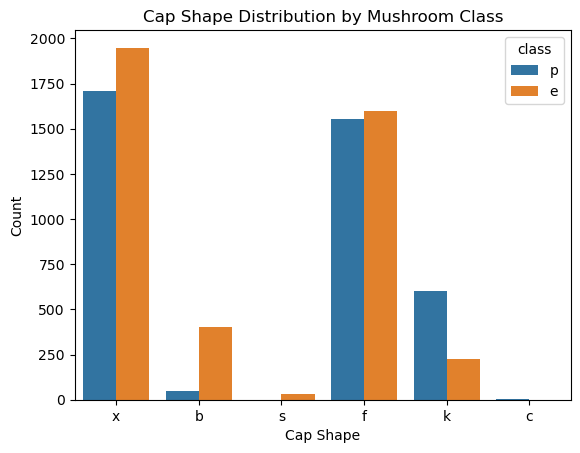

In [37]:
sns.countplot(x="cap-shape", hue="class", data=df)
plt.title("Cap Shape Distribution by Mushroom Class")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.show()

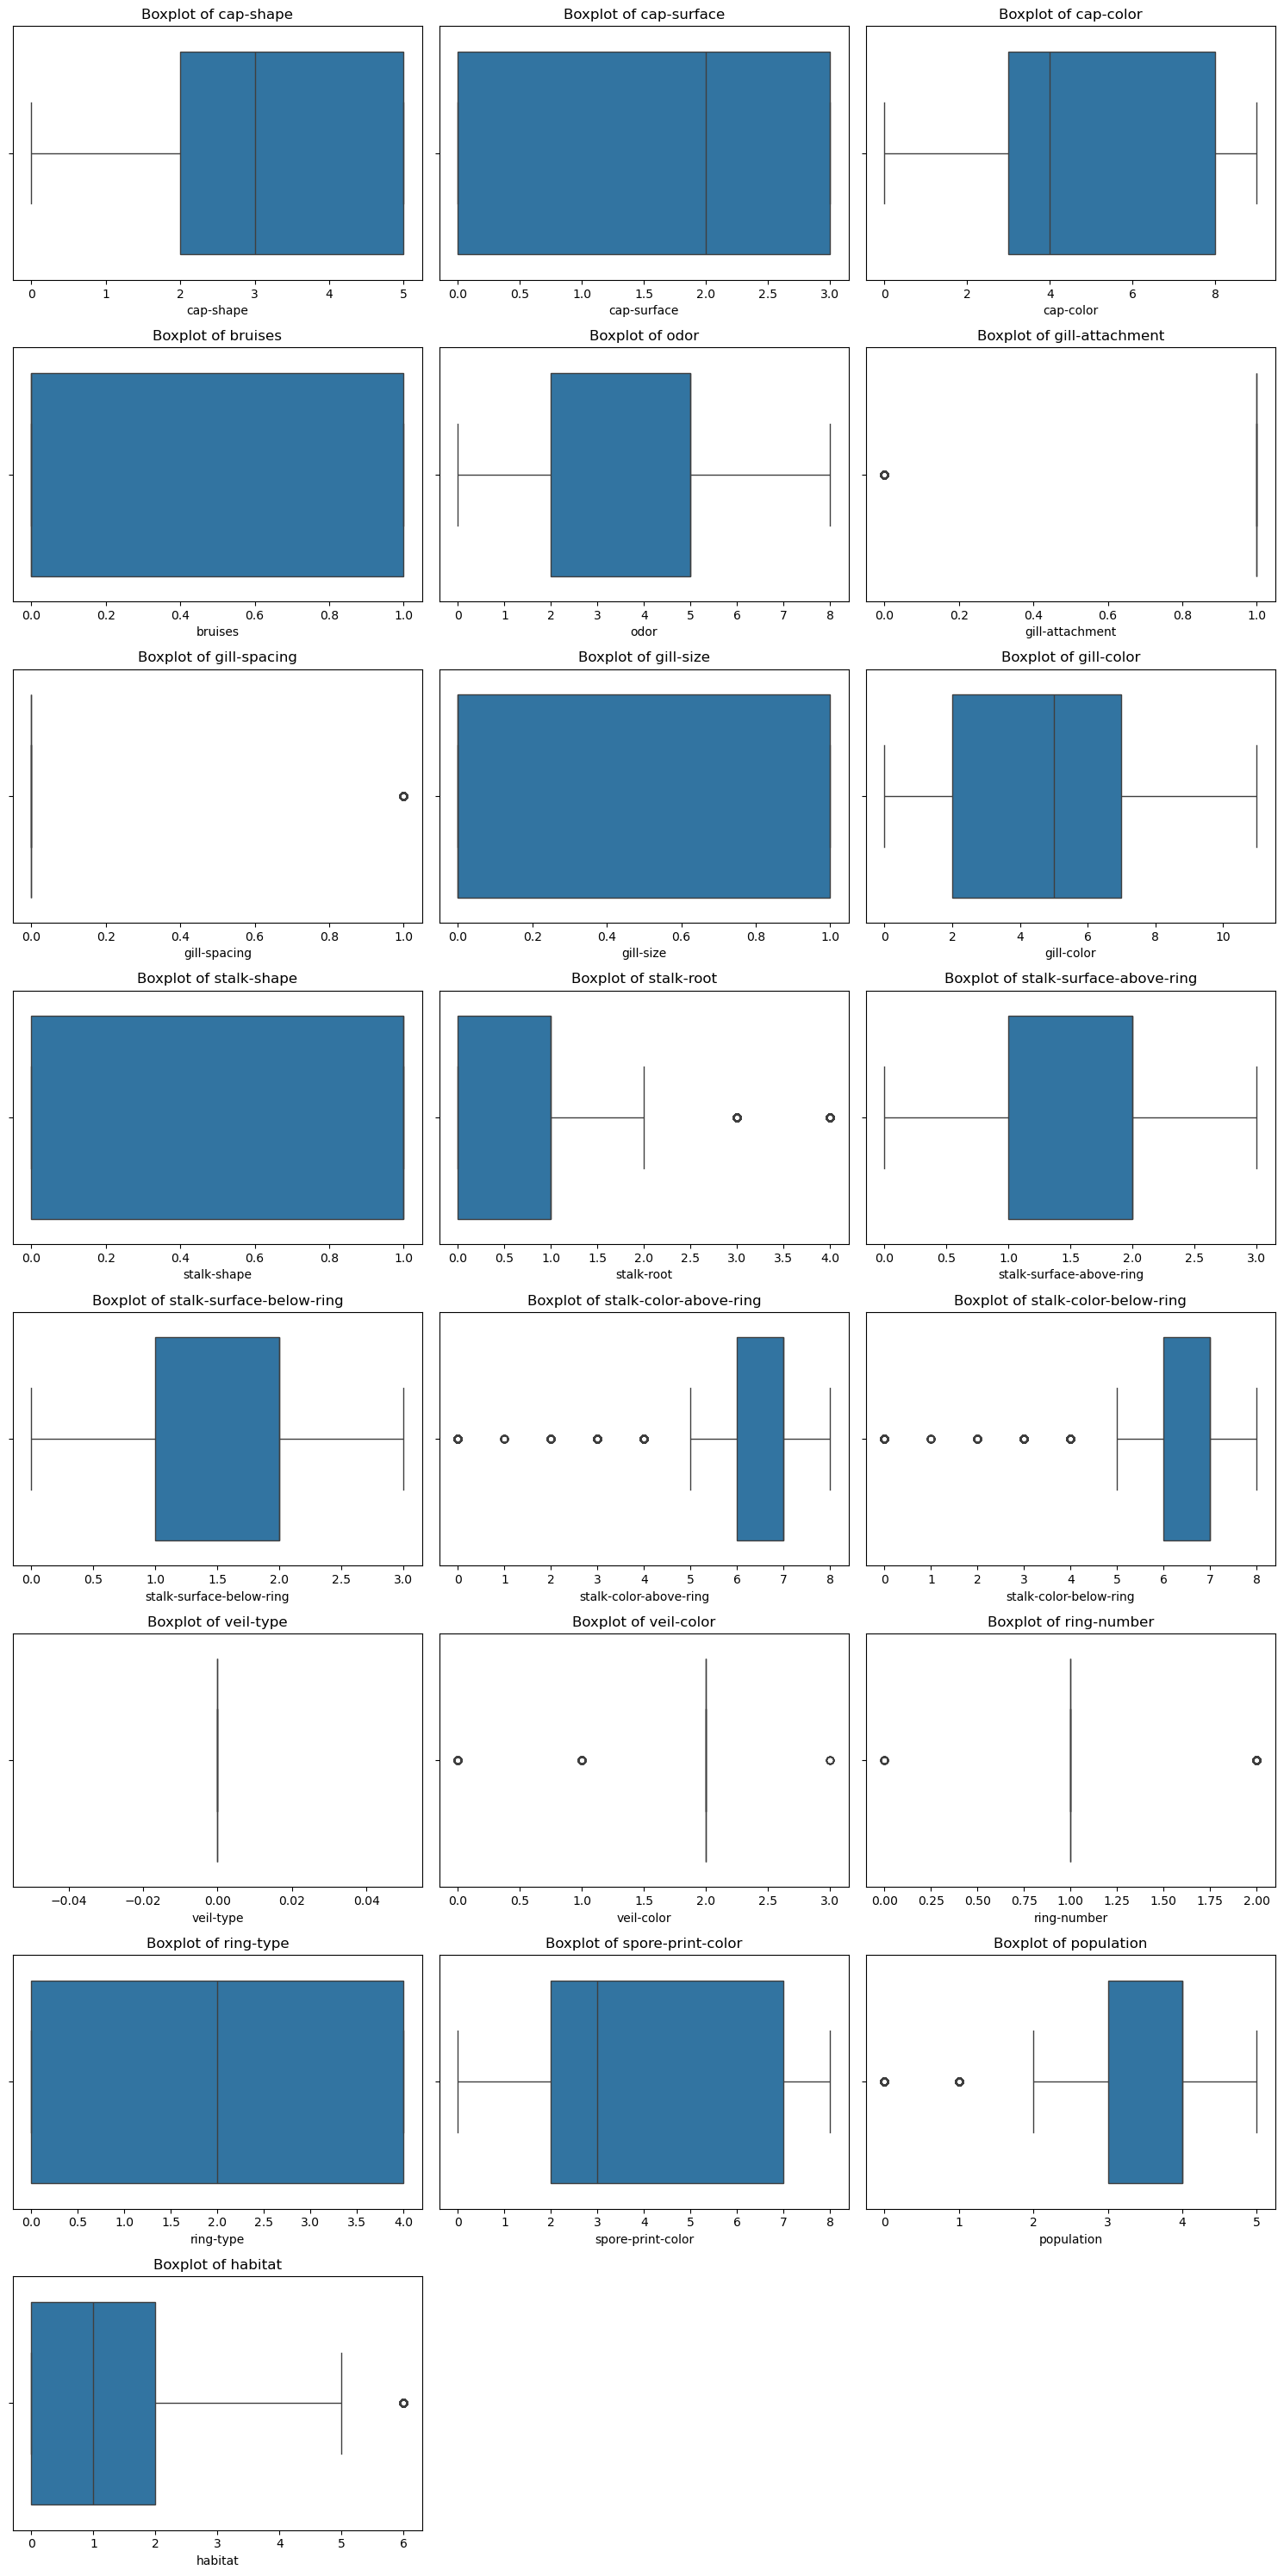

In [58]:
features = df_encoded.columns.drop("class")
plt.figure(figsize=(15, 30))

for i, feature in enumerate(features):
    plt.subplot(len(features)//3 + 1, 3, i+1)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

plt.show()

<h2 style="color: #3B38A0;"> Feature Engineering</h2>

In [60]:
df["capshape_odor"] = df["cap-shape"].astype(str) + "_" + df["odor"].astype(str)

le = LabelEncoder()
df["capshape_odor"] = le.fit_transform(df["capshape_odor"])

In [62]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,capshape_odor
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,24
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,18
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,24
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,23


<h2 style="color: #3B38A0;"> Modeling

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Start timing
start_time = time.time()

print("Step 1: Preparing data...")

# Load data (change path as needed)
df = pd.read_csv("mushrooms.csv")

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop("class", axis=1)
y = df["class"]

print("Data preparation completed.")

print("Step 2: Splitting data...")

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Train-test split completed.")

print("Step 3: Defining models...")

# Define various classification models
models = [
    LogisticRegression(max_iter=500),  # Logistic Regression
    DecisionTreeClassifier(random_state=42),  # Decision Tree
    RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),  # Random Forest
    GradientBoostingClassifier(n_estimators=50, random_state=42),  # Gradient Boosting
    ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1),  # Extra Trees
    KNeighborsClassifier(n_jobs=-1),  # K-Nearest Neighbors
    XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric="logloss", random_state=42),  # XGBoost
    LGBMClassifier(n_estimators=50, random_state=42, n_jobs=-1)  # LightGBM
]

modelNames = [
    "LogisticRegression",
    "DecisionTree",
    "RandomForest",
    "GradientBoosting",
    "ExtraTrees",
    "KNeighbors",
    "XGBoost",
    "LightGBM"
]

print("Models initialized.")

# Create a DataFrame to store results
results = pd.DataFrame(columns=["Accuracy"], index=modelNames)

print("Step 4: Training and evaluating models...")

# Train and evaluate each model
for name, model in zip(modelNames, models):
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.loc[name, "Accuracy"] = accuracy_score(y_test, y_pred)
    print(f"Finished: {name}")

print("\nModel Performance:\n")
# Sort models by accuracy and print
results_sorted = results.sort_values("Accuracy", ascending=False)
print(results_sorted)

# Get predictions of the best model
best_model_name = results_sorted.index[0]
best_model = models[modelNames.index(best_model_name)]
y_pred_best = best_model.predict(X_test)

# Print total runtime
print(f"\nTotal runtime: {round(time.time() - start_time, 2)} seconds")

Step 1: Preparing data...
Data preparation completed.
Step 2: Splitting data...
Train-test split completed.
Step 3: Defining models...
Models initialized.
Step 4: Training and evaluating models...
Training: LogisticRegression
Finished: LogisticRegression
Training: DecisionTree
Finished: DecisionTree
Training: RandomForest
Finished: RandomForest
Training: GradientBoosting
Finished: GradientBoosting
Training: ExtraTrees
Finished: ExtraTrees
Training: KNeighbors
Finished: KNeighbors
Training: XGBoost
Finished: XGBoost
Training: LightGBM
[LightGBM] [Info] Number of positive: 3134, number of negative: 3365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 6499, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore

In [68]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
y_pred = dt_model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

1.0

In [80]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       843\n           1       1.00      1.00      1.00       782\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

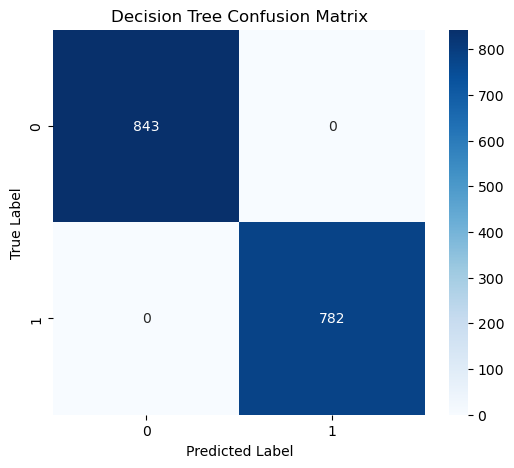

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

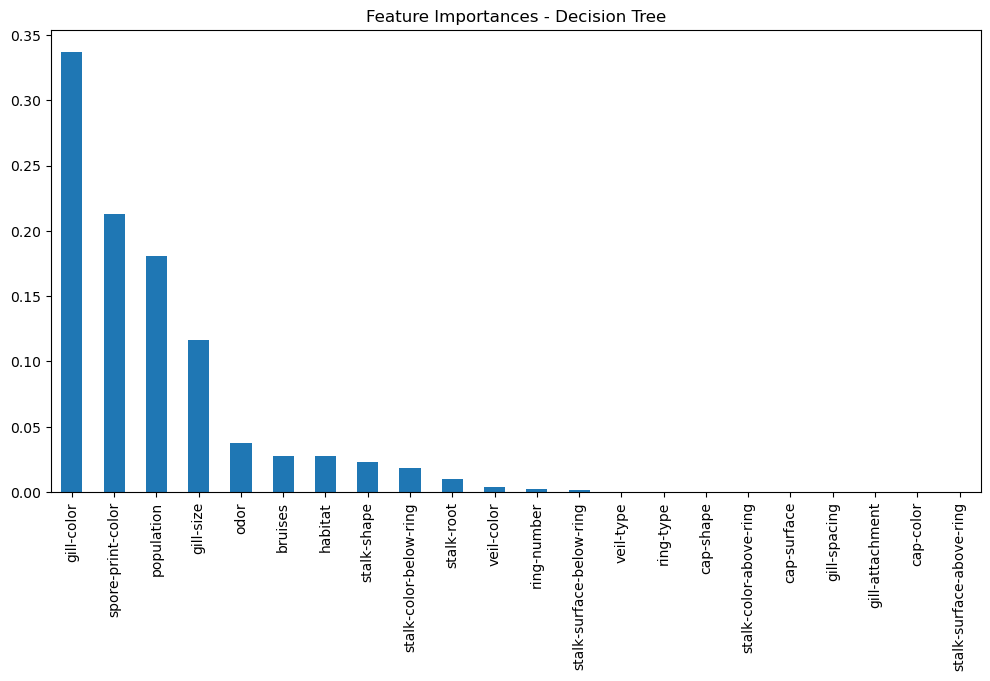

In [88]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importances - Decision Tree")
plt.show()

<h2 style="color: #3B38A0;">Conclusion and Submission</h2>

We built several models to classify mushrooms as edible or poisonous. The Decision Tree and ensemble models performed excellently, achieving nearly perfect accuracy. This project shows that machine learning can effectively help in mushroom classification with proper data processing.

In [95]:
df.to_csv("mushrooms_processed.csv", index=False)